In [25]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [26]:
def ReceptiveField(x):
    x_center = 20
    rc = 1.0
    rs = 8
    kc = 0.65
    ks = 0.2
    a = (x-x_center)**2/2/rc
    b = (x-x_center)**2/2/rs
    y = kc*np.exp(-a) - ks*np.exp(-b)
    return y
# y/(abs(sum(y))*(x[2]-x[1]))

In [27]:
def SpikeTrigger(t):
    b = -1/0.03
    y = t*(t-0.08)*np.exp(b*t)
    return y*5000

In [28]:
def Stimuli(t,x):
    y=np.zeros((tpts,xpts))
    v = 440 # micron/s
    x_lead = v*t # micron
    x_back = v*t - 133
    if x_back < x < x_lead:
        y = -30
    else:
        y = 0
    return y

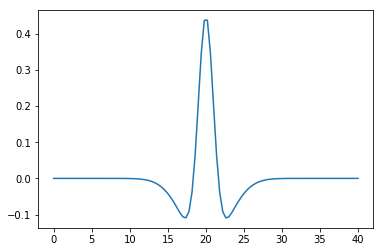

In [29]:
# test receptive field
xpts = 100
x=np.linspace(0,40,xpts)
k_rf=ReceptiveField(x)
plt.plot(x,k_rf)

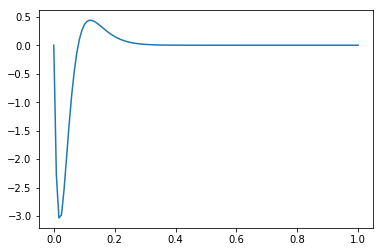

In [30]:
# test temporal kernal 
tpts = 120
t=np.linspace(0,1,tpts)
k_t=SpikeTrigger(t)
plt.plot(t,k_t)

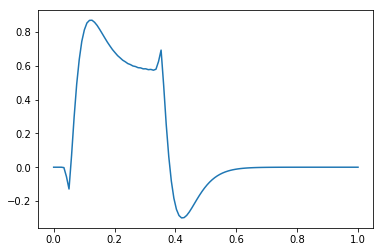

In [31]:
# u(t) with gain function = 1
t1pts = 300
t1 = np.linspace(0,t[-1],t1pts)
SSK = np.zeros((tpts,xpts))
for i in range(xpts):
    SKt_cv = np.zeros(tpts)
    for j in range(tpts):
        sk=np.zeros(t1pts)
        for k in range(t1pts):
            if t[j] >= t1[k]:
                sk[k] = Stimuli(t1[k],x[i])*SpikeTrigger(t[j]-t1[k]) # multiply every element of stimuli and temporal kernal
        SKt_cv[j] = sum(sk)*(t1[2]-t1[1]) # convolution of temporal part
        SSK[j][i] = (SKt_cv[j]*k_rf[i])*(x[2]-x[1])
ut = SSK.sum(axis=1)
plt.plot(t,ut)


In [32]:
# create Gain function
# input v shold be an array
def Gain(v):
    y=np.zeros(len(v))
    for i in range(len(v)):
        if v[i] < 0:
            y[i] = 1
        else:
            y[i] = 1/(1+v[i]**4) 
    return y

In [33]:
t1pts_v = tpts #t' should be same length as ut
t1_v = np.linspace(0,t[-1],t1pts_v)
tpts_v = tpts
t_v=np.linspace(0,t[-1],tpts_v)
# ^^^^^^ reset time parameters ^^^^^^^

B = 45
tau = 0.17
v = np.zeros(tpts_v)
for i in range(tpts_v):
    v_temp = np.zeros(t1pts_v)
    for j in range(t1pts_v):
        if t_v[i] >= t1_v[j]:
            v_temp[j] = B*ut[j]*np.exp(-(t_v[i]-t1_v[j])/tau)
    v[i] = sum(v_temp)*(t1_v[2]-t1_v[1])
g = Gain(v)

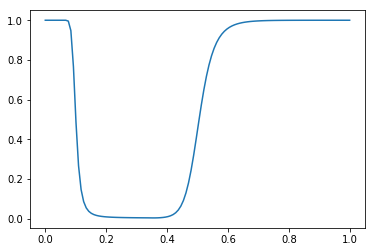

In [34]:
plt.plot(t,g)

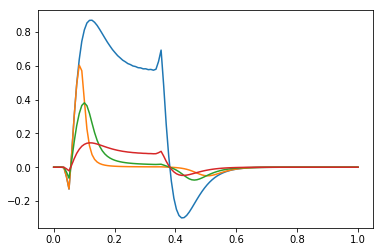

In [35]:
u = g*ut
plt.plot(t,ut) # result without gain function
plt.plot(t,u) # result with gain function 

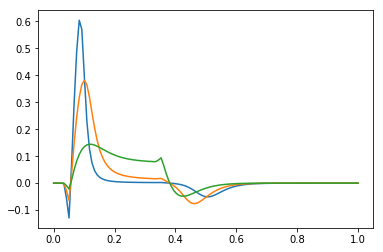

In [36]:
plt.plot(t,u) # result with gain function 
plt.plot(t,u_old)
plt.plot(t,u_oold)